# Question 19

1024 512


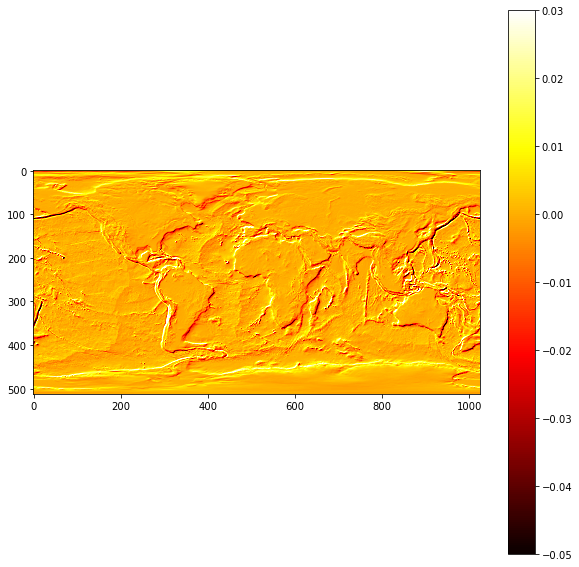

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

w=np.loadtxt(r'altitude.txt')

dw_dx=np.zeros(w.shape)
dw_dy=np.zeros(w.shape)
h=30000
r=w.shape[1]
c=w.shape[0]
print(r,c)

for i in range(r-1):
    for j in range(c):
        dw_dx[j][i]=(w[j][i+1]-w[j][i])/h
        dw_dx[j][r-1]=dw_dx[j][r-2]
for i in range(r):
    for j in range(c-1):
        dw_dy[j][i]=(w[j+1][i]-w[j][i])/h
        dw_dy[c-1][i]=dw_dx[c-2][i]

#part b
I=np.zeros(w.shape)
phi=math.pi/4
for i in range(r):
    for j in range(c):
        I[j][i]=(math.cos(phi)*dw_dx[j][i]+math.sin(phi)*dw_dy[j][i])/math.sqrt(1+ dw_dx[j][i]**2 + dw_dy[j][i]**2)
    
    
plt.figure(figsize=(10,10))
plt.imshow(I, vmax=0.03, vmin=-0.05)
plt.hot()
plt.colorbar()

        



As we can see the deviation in the height w.r.t the h=30000m separation is too small and also the matrix made from altitude text is 512 x 1024 big. So, I calculate the derivative by:
$$f'(x)=\frac{f(x+h)-f(x)}{h}$$
I did this till the second last interval in each row and column(row for $\frac{dw}{dx}$, column for $\frac{dw}{dy}$). The last interval derivative value was then assigned equal to that of the second last interval. This did not create any problem because the grid number is 512 times 1024 which in thsi case means that a small manipulation of this sort does not affect teh quality of the image. And there are no pathological property in the data such as diverging w values near the edges etc, so doing this approximation is completely benign.

676 663


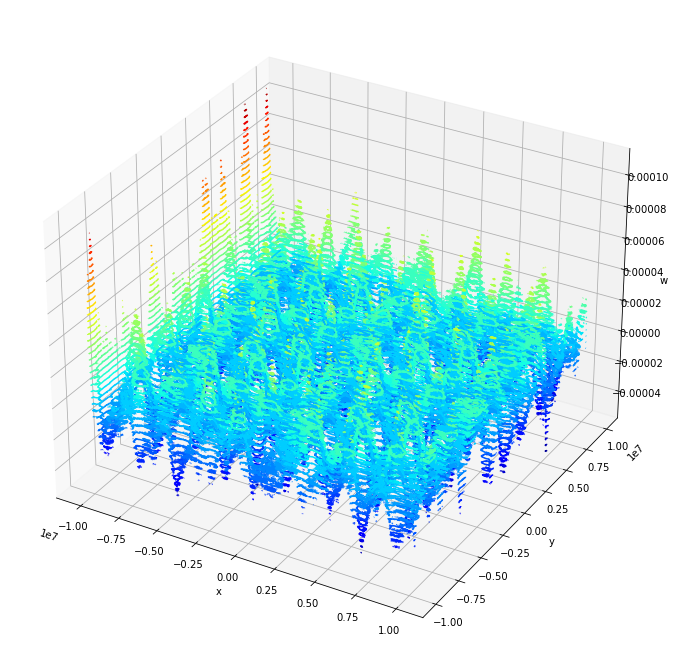

In [4]:
#part c

import numpy as np
import matplotlib.pyplot as plt
import math

w=np.loadtxt(r'stm.txt')

dw_dx=np.zeros(w.shape)
dw_dy=np.zeros(w.shape)
h=30000
r=w.shape[1]
c=w.shape[0]
print(r,c)

for i in range(r-1):
    for j in range(c):
        dw_dx[j][i]=(w[j][i+1]-w[j][i])/h
        dw_dx[j][r-1]=dw_dx[j][r-2]
for i in range(r):
    for j in range(c-1):
        dw_dy[j][i]=(w[j+1][i]-w[j][i])/h
        dw_dy[c-1][i]=dw_dx[c-2][i]

#part b
I=np.zeros(w.shape)
phi=math.pi/4
for i in range(r):
    for j in range(c):
        I[j][i]=(math.cos(phi)*dw_dx[j][i]+math.sin(phi)*dw_dy[j][i])/math.sqrt(1+ dw_dx[j][i]**2 + dw_dy[j][i]**2)
        
x=np.linspace((-h*r)/2, (h*r)/2, r)
y=np.linspace((-h*c)/2, (h*c)/2, c)

fig=plt.figure(figsize=(12,12))
silicon = plt.axes(projection='3d')
silicon.contour3D(x, y, I, 50, cmap='jet')
silicon.set_xlabel('x')
silicon.set_ylabel('y')
silicon.set_zlabel('w');